In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

In [11]:
data = pd.read_csv("./data/trainingdataset.csv")
print(data)

         A
0    33.46
1     1.16
2    23.54
3    16.92
4    91.24
..     ...
495  51.38
496  98.12
497  96.89
498  47.91
499  92.88

[500 rows x 1 columns]         A
0   90.57
1   71.09
2   64.51
3   83.13
4   72.13
5   59.28
6   12.92
7   15.28
8   90.43
9   32.83
10  52.48
11  66.57
12  40.08
13  29.61
14  37.73
15  75.32
16   7.66
17  61.77
18  95.60
19   3.96
20  80.27
21   6.24
22  24.30
23  48.86
24  64.28
25  48.88
26  50.36
27  57.66
28  33.70
29  15.97
30  79.47
31  99.54
32   4.31
33  25.96
34  54.57
35  97.03
36  34.30
37  46.74
38  91.46
39  94.73
40  85.32
41  49.50
42  96.30
43   9.81
44  38.58
45   8.59
46  82.19
47  81.84
48  50.15
49   9.04


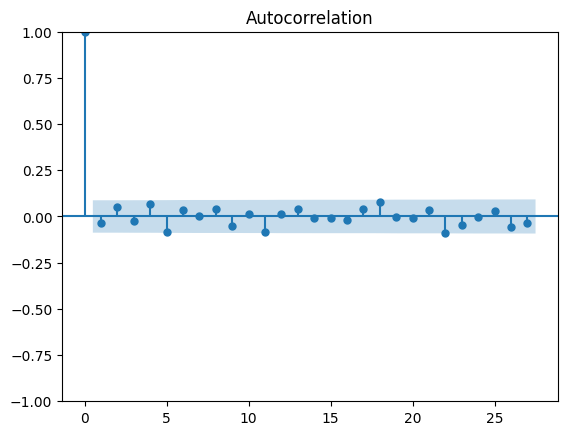

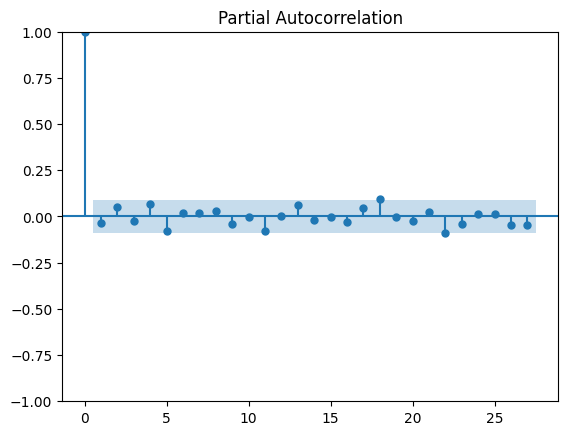

In [12]:
# a) Identify ARIMA Order (p, d, q)
plot_acf(trainData)
plot_pacf(trainData)
plt.show()  # Visually inspect the plots to determine p, d, q

In [5]:
# creating training and test data set
# size = int(len(data) * 0.8)
# trainData, testData = data[0:size], data[size: len(data)]
# print(trainData, testData)

         A
0     0.16
1     0.92
2    14.52
3    54.47
4    15.62
..     ...
115  20.64
116  26.67
117  67.21
118  67.13
119  88.76

[120 rows x 1 columns]          A
120  89.14
121  35.82
122  10.95
123  77.59
124  74.93
125  98.87
126  23.23
127  95.21
128  23.22
129  72.36
130  54.12
131  65.58
132  48.51
133  41.67
134  18.79
135  79.67
136  34.39
137  45.76
138  12.41
139  59.73
140  39.90
141  73.88
142  24.73
143  54.03
144  26.53
145  23.49
146  14.70
147  37.07
148  44.19
149  28.00


In [13]:
# b) Model estimation
# Replace with identified order based on ACF/PACF analysis
model = ARIMA(trainData, order=(1, 2, 3))  # Example order, adjust based on your analysis
modelFit = model.fit()
print(modelFit.summary())

c:\Users\Fahim Ahammed Firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      A   No. Observations:                  500
Model:                 ARIMA(1, 2, 3)   Log Likelihood               -2391.866
Date:                Wed, 10 Jan 2024   AIC                           4793.731
Time:                        16:37:22   BIC                           4814.784
Sample:                             0   HQIC                          4801.994
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9905      0.025    -39.018      0.000      -1.040      -0.941
ma.L1         -0.9995      5.045     -0.198      0.843     -10.888       8.889
ma.L2         -0.9999     10.063     -0.099      0.9

In [14]:
# c) Model evaluation (assuming you have a test set)
forecast = modelFit.forecast(steps=len(testData))
mse = mean_squared_error(testData, forecast)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 891.7752234668759
RMSE: 29.86260577154773


In [15]:
# d) Forecasting
forecast = pd.Series(forecast, index=testData.index)  # Assuming you want the index to match the last n_periods_to_forecast of the original data
print(forecast)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
25   NaN
26   NaN
27   NaN
28   NaN
29   NaN
30   NaN
31   NaN
32   NaN
33   NaN
34   NaN
35   NaN
36   NaN
37   NaN
38   NaN
39   NaN
40   NaN
41   NaN
42   NaN
43   NaN
44   NaN
45   NaN
46   NaN
47   NaN
48   NaN
49   NaN
Name: predicted_mean, dtype: float64


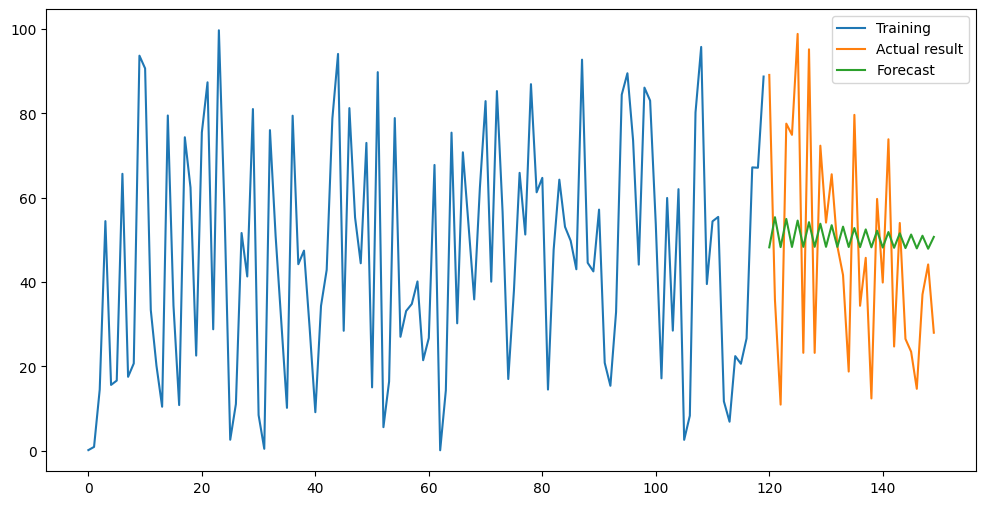

In [9]:
# Visualization with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(trainData, label="Training")
plt.plot(testData, label="Actual result")
plt.plot(forecast, label="Forecast")
plt.legend()
plt.show()